# Task 3: Event Impact Modeling

Model how events (policies, product launches, infrastructure investments) affect financial inclusion indicators in Ethiopia.

## 1. Load Data and Configure Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import datetime
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 100)

root = Path.cwd()
if not (root / "data").exists():
    root = root.parent

raw_path = root / "data" / "raw"

unified_path = raw_path / "ethiopia_fi_unified_data.csv"
ref_path = raw_path / "reference_codes.csv"

unified = pd.read_csv(unified_path)
ref_codes = pd.read_csv(ref_path)

for col in ["observation_date", "period_start", "period_end"]:
    if col in unified.columns:
        unified[col] = pd.to_datetime(unified[col], errors="coerce")

unified["year"] = unified["observation_date"].dt.year

unified.head()

,record_id,parent_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,unit,observation_date,period_start,period_end,fiscal_year,gender,location,region,source_name,source_type,source_url,confidence,related_indicator,relationship_type,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
0,REC_0001,NaN,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,%,2014-12-31,NaT,NaT,2014,all,national,NaN,Global Findex 2014,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014.0
1,REC_0002,NaN,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,%,2017-12-31,NaT,NaT,2017,all,national,NaN,Global Findex 2017,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017.0
2,REC_0003,NaN,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,%,2021-12-31,NaT,NaT,2021,all,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021.0
3,REC_0004,NaN,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,%,2021-12-31,NaT,NaT,2021,male,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021.0
4,REC_0005,NaN,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,%,2021-12-31,NaT,NaT,2021,female,national,NaN,Global Findex 2021,survey,https://www.worldbank.org/en/publication/globa...,high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021.0


## 2. Load Impact Links and Join to Events

In [2]:
events = unified[unified["record_type"] == "event"].copy()
impact_links = unified[unified["record_type"] == "impact_link"].copy()

impact_join = impact_links.merge(
    events[["record_id", "indicator", "category", "observation_date"]],
    left_on="parent_id",
    right_on="record_id",
    how="left",
    suffixes=("", "_event")
)

impact_join[["parent_id", "indicator_event", "category", "pillar", "related_indicator", "impact_direction", "impact_magnitude", "lag_months", "observation_date_event"]]


,parent_id,indicator_event,category,pillar,related_indicator,impact_direction,impact_magnitude,lag_months,observation_date_event
0,EVT_0001,Telebirr Launch,NaN,USAGE,direct,high,NaN,empirical,2021-05-17
1,EVT_0003,M-Pesa Ethiopia Launch,NaN,USAGE,direct,medium,NaN,empirical,2023-08-01
2,EVT_0004,Fayda Digital ID Program Rollout,NaN,ACCESS,enabling,high,NaN,empirical,2024-01-01
3,EVT_0008,EthioPay Instant Payment System Launch,NaN,USAGE,direct,medium,NaN,theoretical,2025-12-18
4,EVT_0002,Safaricom Ethiopia Commercial Launch,NaN,ACCESS,enabling,low,NaN,literature,2022-08-01


## 3. Event → Indicator Summary Table

In [3]:
event_indicator_summary = impact_join[[
    "parent_id",
    "indicator_event",
    "category",
    "related_indicator",
    "impact_direction",
    "impact_magnitude",
    "lag_months",
    "evidence_basis",
    "confidence"
]].sort_values(["parent_id", "related_indicator"])

event_indicator_summary

,parent_id,indicator_event,category,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,confidence
0,EVT_0001,Telebirr Launch,NaN,direct,high,NaN,empirical,NaN,USG_TELEBIRR_USERS
4,EVT_0002,Safaricom Ethiopia Commercial Launch,NaN,enabling,low,NaN,literature,NaN,ACC_MOBILE_PEN
1,EVT_0003,M-Pesa Ethiopia Launch,NaN,direct,medium,NaN,empirical,NaN,USG_MPESA_USERS
2,EVT_0004,Fayda Digital ID Program Rollout,NaN,enabling,high,NaN,empirical,NaN,ACC_FAYDA
3,EVT_0008,EthioPay Instant Payment System Launch,NaN,direct,medium,NaN,theoretical,NaN,USG_P2P_COUNT


## 4. Build Event–Indicator Association Matrix

Map qualitative magnitudes to numeric effects for a simple additive model.

In [4]:
magnitude_map = {
    "high": 0.15,
    "medium": 0.08,
    "low": 0.03,
    "negligible": 0.01
}

direction_map = {
    "increase": 1,
    "decrease": -1,
    "stabilize": 0,
    "mixed": 0
}

impact_model = impact_join.copy()
impact_model["effect_size"] = impact_model["impact_magnitude"].map(magnitude_map).fillna(0.0)
impact_model["direction_sign"] = impact_model["impact_direction"].map(direction_map).fillna(0.0)
impact_model["effect"] = impact_model["effect_size"] * impact_model["direction_sign"]

association_matrix = impact_model.pivot_table(
    index="indicator_event",
    columns="related_indicator",
    values="effect",
    aggfunc="sum",
    fill_value=0
)

association_matrix

related_indicator,direct,enabling
indicator_event,,
EthioPay Instant Payment System Launch,0.0,0.0
Fayda Digital ID Program Rollout,0.0,0.0
M-Pesa Ethiopia Launch,0.0,0.0
Safaricom Ethiopia Commercial Launch,0.0,0.0
Telebirr Launch,0.0,0.0


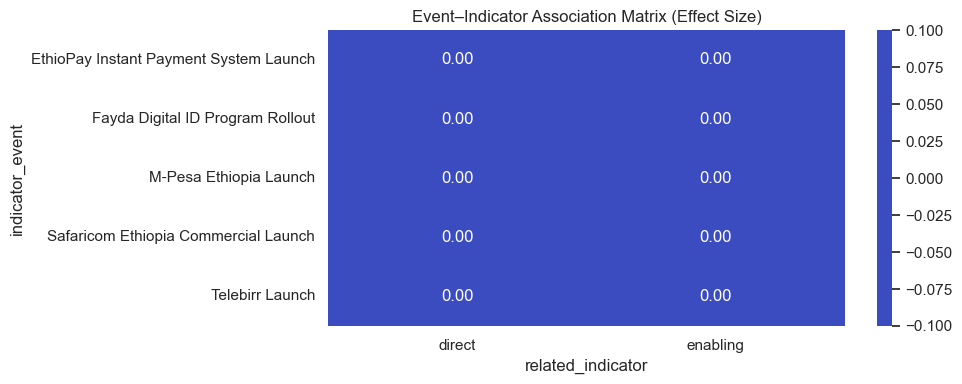

In [5]:
plt.figure(figsize=(10, 4))
sns.heatmap(association_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Event–Indicator Association Matrix (Effect Size)")
plt.tight_layout()
plt.show()

## 5. Simple Impact Model: Event Effects Over Time

Assume effects start after `lag_months` and persist for 3 years with a linear ramp-up.

In [7]:
def event_effect_series(event_date, effect, lag_months=0, duration_years=3):
    if pd.isna(event_date):
        return pd.Series(dtype=float)
    lag_months = 0 if pd.isna(lag_months) else int(lag_months)
    start = (event_date + pd.DateOffset(months=lag_months)).year
    years = np.arange(start, start + duration_years)
    ramp = np.linspace(0.3, 1.0, duration_years)
    return pd.Series(effect * ramp, index=years)

impact_model["lag_months_num"] = pd.to_numeric(impact_model["lag_months"], errors="coerce").fillna(0)

impact_effects = []
for _, row in impact_model.iterrows():
    series = event_effect_series(
        row.get("observation_date_event"),
        row.get("effect", 0.0),
        row.get("lag_months_num", 0)
    )
    if not series.empty:
        for year, val in series.items():
            impact_effects.append({
                "year": year,
                "related_indicator": row.get("related_indicator"),
                "event": row.get("indicator_event"),
                "effect": val
            })

effects_df = pd.DataFrame(impact_effects)

if effects_df.empty:
    print("No effects to model.")
else:
    effects_pivot = effects_df.pivot_table(index="year", columns="related_indicator", values="effect", aggfunc="sum")
    effects_pivot

## 6. Compare Model vs Observed (Telebirr & Mobile Money)

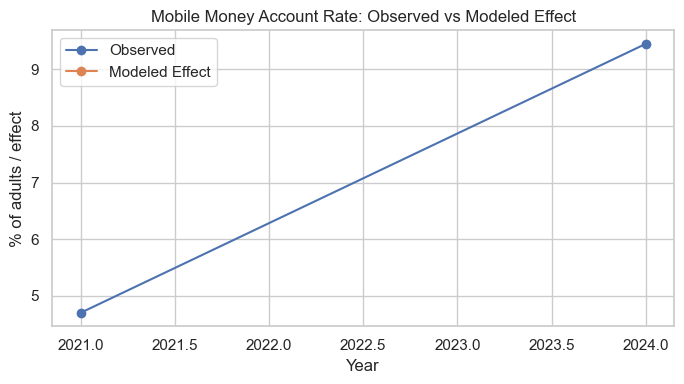

In [8]:
obs = unified[unified["record_type"] == "observation"].copy()
mm = obs[obs["indicator_code"] == "ACC_MM_ACCOUNT"].sort_values("year")

if not mm.empty and not effects_df.empty:
    modeled = effects_df[effects_df["related_indicator"] == "ACC_MM_ACCOUNT"].groupby("year")["effect"].sum()
    compare = mm.set_index("year")["value_numeric"].to_frame("observed")
    compare["modeled_effect"] = modeled
    compare

    plt.figure(figsize=(7, 4))
    plt.plot(compare.index, compare["observed"], marker="o", label="Observed")
    plt.plot(compare.index, compare["modeled_effect"], marker="o", label="Modeled Effect")
    plt.title("Mobile Money Account Rate: Observed vs Modeled Effect")
    plt.xlabel("Year")
    plt.ylabel("% of adults / effect")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient data for model comparison.")

## 7. Methodology and Assumptions

- Effects modeled as additive step/ramp starting after `lag_months`.
- Magnitudes mapped to numeric effects (high=0.15, medium=0.08, low=0.03).
- Effects persist for 3 years and ramp linearly.
- Multiple events affecting the same indicator add together.

Document any adjustments after comparing modeled vs observed outcomes.

## 8. Uncertainties and Limitations

- Sparse indicator coverage makes calibration weak.
- Event effects likely non-linear and context-specific.
- No counterfactual baseline included.
- Lag structure is assumed, not estimated from data.

## 9. Export Association Matrix

Save the event–indicator matrix for reporting.

In [9]:
output_dir = root / "reports"
output_dir.mkdir(parents=True, exist_ok=True)
association_matrix.to_csv(output_dir / "event_indicator_association_matrix.csv")
print(f"Saved: {output_dir / 'event_indicator_association_matrix.csv'}")

Saved: c:\Users\weldi\Desktop\week_10\ethiopia-fi-forecast\reports\event_indicator_association_matrix.csv
